# Image Classification using `Keras`

* Case study with `---` dataset

## Load the `python` modules

In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn import datasets
#from sklearn.datasets import load_iris

# Configure the matlotlib backend as plotting inline in IPython:
%matplotlib inline

## Load the `tensorflow` modules

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

Chapter 2 Chollet

### Load the MNIST dataset in Keras

* this dataset is already split into a training and testing set
* you can extract only the training set as follows:
```python
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
```

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### Look at the training data

In [4]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28), 60000, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

#### Look at the testing data

In [5]:
test_images.shape, len(test_labels), test_labels

((10000, 28, 28), 10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

### The network architecture

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Metal device set to: Apple M1 Max


### The compilation step

In [7]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Prepare the image data

* preprocess the data by reshaping it into the shape the model expects, and
* scale it so that all values are in the [0, 1] interval
* the training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval
* transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [9]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

### Fit the model

In [10]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [11]:
model_history = model.fit(train_images, train_labels,
                          epochs=5,
                          batch_size=128,
                          verbose=1,
                          validation_split = 0.2,
                          callbacks=[early_stop]
                         )

Epoch 1/5


2023-06-01 11:40:54.432219: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 4s 8ms/step - loss: 0.2812 - accuracy: 0.9194 - val_loss: 0.1507 - val_accuracy: 0.9548
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.1181 - accuracy: 0.9651 - val_loss: 0.1119 - val_accuracy: 0.9670
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0778 - accuracy: 0.9770 - val_loss: 0.0878 - val_accuracy: 0.9740
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.0782 - val_accuracy: 0.9767
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0416 - accuracy: 0.9877 - val_loss: 0.0804 - val_accuracy: 0.9776


### Use the model to make predictions

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 104ms/step


array([5.2673594e-09, 1.5961934e-09, 2.6317127e-06, 1.3002964e-04,
       9.2653793e-13, 1.1427162e-08, 1.6871788e-13, 9.9986649e-01,
       8.4225512e-08, 6.4803686e-07], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.9998665

### Evaluate the model on new data

In [15]:
model.metrics_names

['loss', 'accuracy']

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

In [17]:
print(f"test_acc: {test_acc}")

test_acc: 0.9783000349998474


* the gap between training accuracy and test accuracy is an example of overfitting

### Display the fourth digit in the dataset

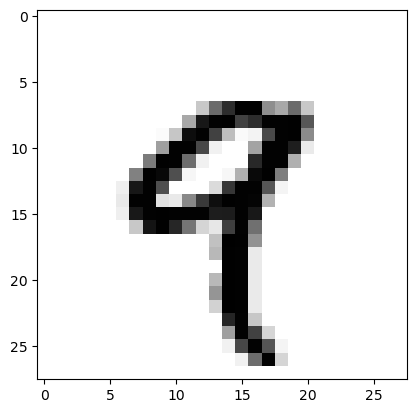

In [18]:
digit = train_images[4]
plt.imshow(digit.reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [19]:
digit.shape

(784,)

In [20]:
train_labels[4]

9

### Plot the training and validation accuracy and loss

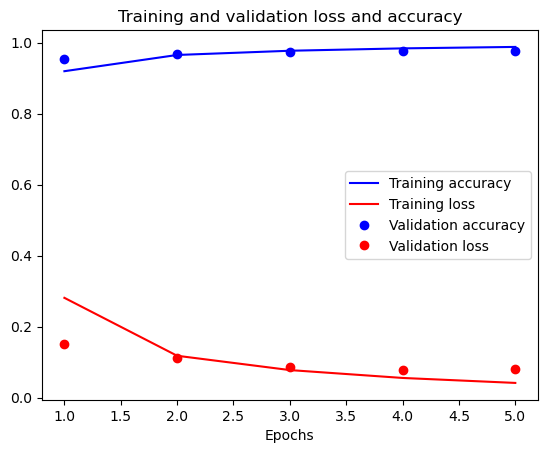

In [21]:
loss = model_history.history["loss"]
acc = model_history.history["accuracy"]
val_loss = model_history.history["val_loss"]
val_acc = model_history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "b-", label="Training accuracy")
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_acc, "bo", label="Validation accuracy")
plt.plot(epochs, val_loss, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.title("Training and validation loss and accuracy")
#plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Automate the built of the network with a function

In [22]:
def get_model():
    '''
    How to use it:
    model = get_model()
    '''
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [23]:
def plot_loss(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "r", label='loss')
    plt.plot(epochs, val_loss, "r--", label='validation loss')
    #plt.ylim([0, 20])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Training and validation loss")
    plt.grid(True)

In [24]:
def plot_acc(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, "b-", label='accuracy')
    plt.plot(epochs, val_acc, "b--", label='validation accuracy')
    #plt.ylim([0, 20])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title("Training and validation accuracy")
    plt.grid(True)

### Improve the model
#### Train an MNIST model with an incorrectly high learning rate
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop

In [25]:
model_HLR = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# for MacOS M1/M2 users only:
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=1.)
# for Windows users:
#opt = keras.optimizers.RMSprop(learning_rate=1.)
model_HLR.compile(optimizer=opt,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

history_model_HLR = model_HLR.fit(train_images, train_labels,
                                  epochs=10,
                                  batch_size=128,
                                  validation_split=0.2,
                                  callbacks=[early_stop]
                                 )

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 845.6535 - accuracy: 0.4124 - val_loss: 2.4254 - val_accuracy: 0.3122
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 7.7475 - accuracy: 0.2861 - val_loss: 2.2356 - val_accuracy: 0.2453
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 3.3537 - accuracy: 0.2626 - val_loss: 2.6617 - val_accuracy: 0.3014
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 3.1502 - accuracy: 0.2674 - val_loss: 2.1082 - val_accuracy: 0.2372
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 2.6454 - accuracy: 0.2408 - val_loss: 2.0842 - val_accuracy: 0.2551
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 2.3357 - accuracy: 0.2601 - val_loss: 2.3968 - val_accuracy: 0.2330
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 2.5969 - accuracy: 0.2653 - val_loss: 2.6433 - val_accuracy: 0.2500
Epoc

In [26]:
results_HLR = model_HLR.evaluate(test_images, test_labels, verbose=0)
print('loss: ', results_HLR[0], 'accuracy: ', results_HLR[1])

loss:  2.1778862476348877 accuracy:  0.24630001187324524


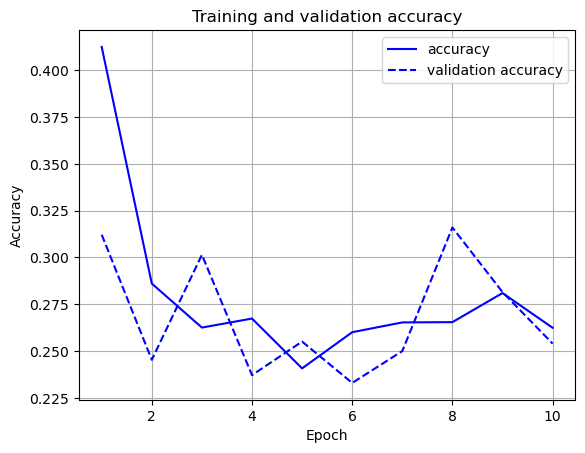

In [27]:
plot_acc(history_model_HLR)

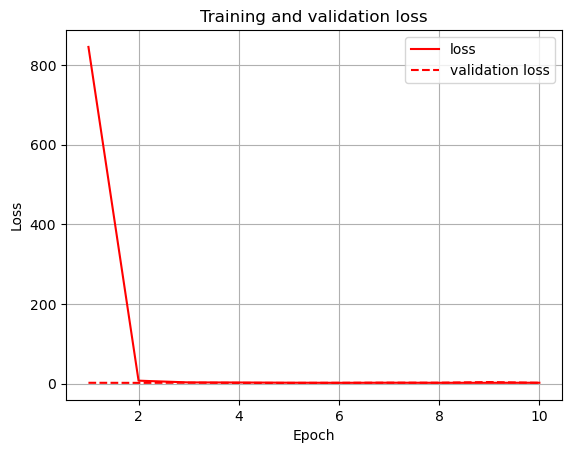

In [28]:
plot_loss(history_model_HLR)

#### The same model with a more appropriate learning rate

In [29]:
model_ALR = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# for MacOS M1/M2 users only:
opt = keras.optimizers.legacy.RMSprop(learning_rate=1e-2)
# for Windows users:
#opt = keras.optimizers.RMSprop(learning_rate=1e-2)
model_ALR.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

history_model_ALR = model_ALR.fit(train_images, train_labels,
                                  epochs=10,
                                  batch_size=128,
                                  validation_split=0.2,
                                  callbacks=[early_stop]
                                 )

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3417 - accuracy: 0.9136 - val_loss: 0.1769 - val_accuracy: 0.9521
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1414 - accuracy: 0.9646 - val_loss: 0.1699 - val_accuracy: 0.9595
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1161 - accuracy: 0.9733 - val_loss: 0.1745 - val_accuracy: 0.9648
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0947 - accuracy: 0.9789 - val_loss: 0.2106 - val_accuracy: 0.9658
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0851 - accuracy: 0.9815 - val_loss: 0.2018 - val_accuracy: 0.9711
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0719 - accuracy: 0.9855 - val_loss: 0.2737 - val_accuracy: 0.9682
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0702 - accuracy: 0.9864 - val_loss: 0.3405 - val_accuracy: 0.9628
Epoch 

In [30]:
results_ALR = model_ALR.evaluate(test_images, test_labels, verbose=0)
print('loss: ', results_ALR[0], 'accuracy: ', results_ALR[1])

loss:  0.2593099772930145 accuracy:  0.9776000380516052


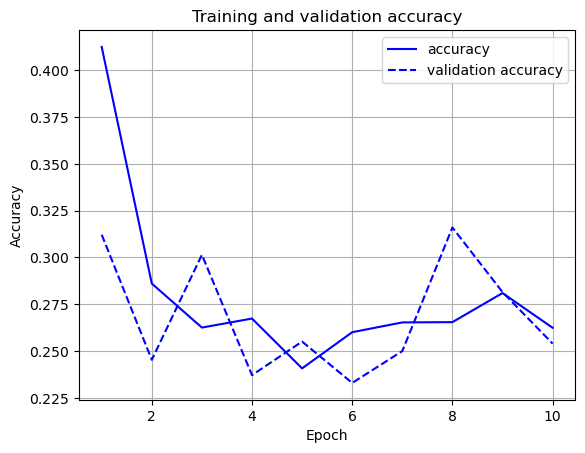

In [31]:
plot_acc(history_model_HLR)

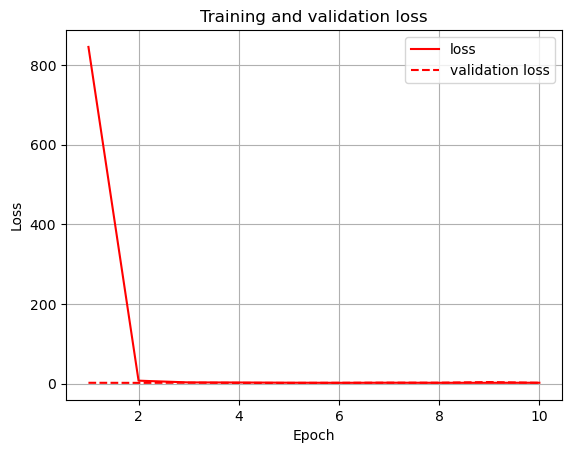

In [32]:
plot_loss(history_model_HLR)

#### If you find yourself in a similar situation, try

* Lowering or increasing the learning rate.
    * A learning rate that is too high may lead to updates that vastly overshoot a proper fit, like in the preceding example, and a learning rate that is too low may make training so slow that it appears to stall.
* Increasing the batch size.
    * A batch with more samples will lead to gradients that are more informative and less noisy (lower variance).

* The following line is to stop the execution of the notebook after this cell:

%%script false --no-raise-error

### Increase model capacity
#### A simple logistic regression on MNIST

del model_LR

In [33]:
model_LR = keras.Sequential([layers.Dense(10, activation="softmax")])

model_LR.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

history_model_LR = model_LR.fit(train_images, train_labels,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2,
                                callbacks=[early_stop]
                               )

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6792 - accuracy: 0.8306 - val_loss: 0.3599 - val_accuracy: 0.9031
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3513 - accuracy: 0.9027 - val_loss: 0.3055 - val_accuracy: 0.9169
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3154 - accuracy: 0.9125 - val_loss: 0.2918 - val_accuracy: 0.9184
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2992 - accuracy: 0.9162 - val_loss: 0.2807 - val_accuracy: 0.9215
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2892 - accuracy: 0.9191 - val_loss: 0.2742 - val_accuracy: 0.9243
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2831 - accuracy: 0.9208 - val_loss: 0.2736 - val_accuracy: 0.9240
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2781 - accuracy: 0.9223 - val_loss: 0.2694 - val_accuracy: 0.9269
Epoch 

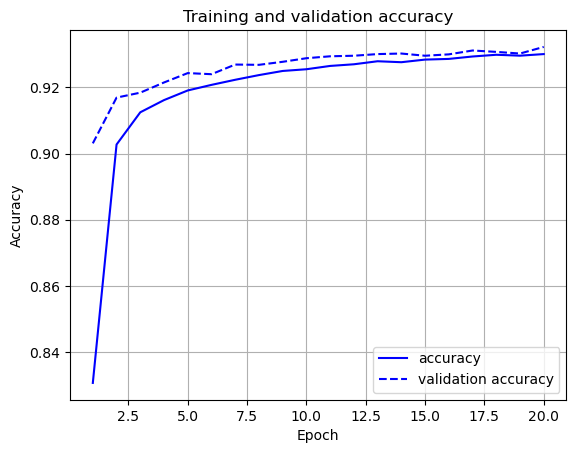

In [34]:
plot_acc(history_model_LR)

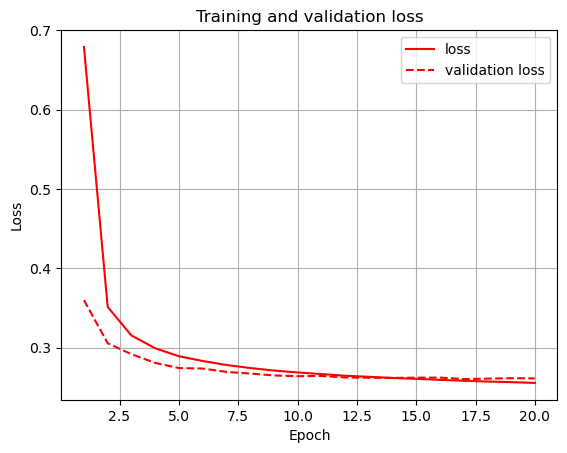

In [35]:
plot_loss(history_model_LR)

* If you can’t seem to be able to overfit, it’s likely a problem with the representational power of your model:
* you’re going to need a bigger model, one with more capacity, that is to say, one able to store more information
*  You can increase `representational power` by adding more layers, using bigger layers (layers with more parameters), or using kinds of layers that are more appropriate for the problem at hand (better architecture priors)

#### Let’s try training a bigger model, one with two intermediate layers with 96 units each:

In [36]:
model_large = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model_large.compile(optimizer="rmsprop",
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"])

history_large_model = model_large.fit(train_images, train_labels,
                                      epochs=20,
                                      batch_size=128,
                                      validation_split=0.2,
                                      callbacks=[early_stop]
                                     )

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: 0.3584 - accuracy: 0.8993 - val_loss: 0.2169 - val_accuracy: 0.9378
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1681 - accuracy: 0.9501 - val_loss: 0.1499 - val_accuracy: 0.9567
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1205 - accuracy: 0.9642 - val_loss: 0.1195 - val_accuracy: 0.9647
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0930 - accuracy: 0.9717 - val_loss: 0.1132 - val_accuracy: 0.9653
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0748 - accuracy: 0.9774 - val_loss: 0.1015 - val_accuracy: 0.9689
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0600 - accuracy: 0.9820 - val_loss: 0.0969 - val_accuracy: 0.9722
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0984 - val_accuracy: 0.9705
Epoch 

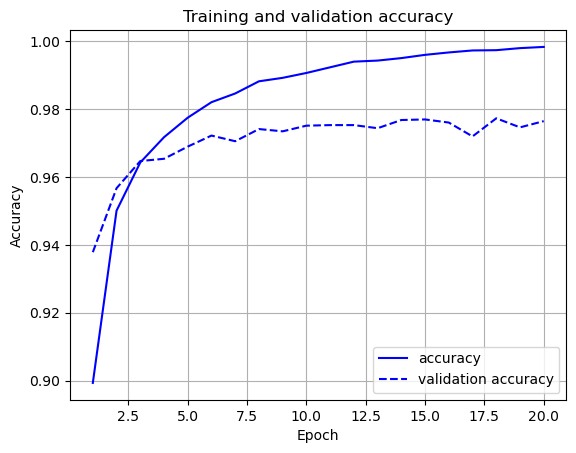

In [37]:
plot_acc(history_large_model)

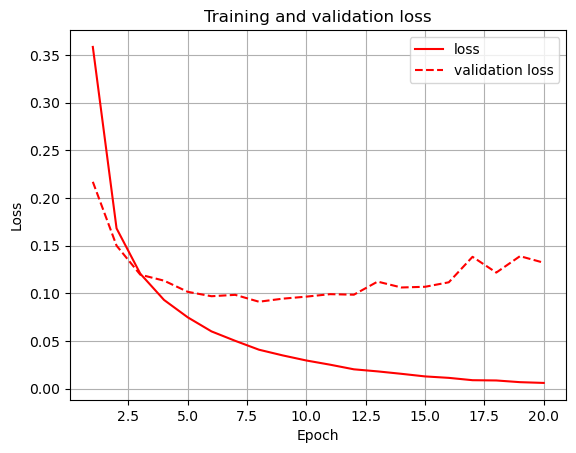

In [38]:
plot_loss(history_large_model)

* The validation curve now looks exactly like it should: the model fits fast and starts overfitting after 8 epochs

## Improving generalization

Section 5.4 of Chollet

In [39]:
from tensorflow.keras import regularizers

In [40]:
# L1 regularization
regularizers.l1(0.001)

In [41]:
# Simultaneous L1 and L2 regularization
regularizers.l1_l2(l1=0.001, l2=0.001)

del model_L2

In [42]:
# Adding L2 weight regularization to the model:
model_L2 = keras.Sequential([
    layers.Dense(96,
                 kernel_regularizer=regularizers.l2(0.02),
                 activation="relu"),
    layers.Dense(96,
                 kernel_regularizer=regularizers.l2(0.02),
                 activation="relu"),
    layers.Dense(10,
                 activation="softmax")
])

model_L2.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

history_l2_reg = model_L2.fit(train_images, train_labels,
                              epochs=20,
                              batch_size=128,
                              validation_split=0.2
                             )

Epoch 1/20
375/375 [==============================] - 6s 16ms/step - loss: 1.5667 - accuracy: 0.8559 - val_loss: 0.7815 - val_accuracy: 0.8931
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.7286 - accuracy: 0.8903 - val_loss: 0.6413 - val_accuracy: 0.9086
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.6402 - accuracy: 0.9009 - val_loss: 0.6210 - val_accuracy: 0.8982
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.5840 - accuracy: 0.9103 - val_loss: 0.5450 - val_accuracy: 0.9178
Epoch 5/20
375/375 [==============================] - 6s 15ms/step - loss: 0.5444 - accuracy: 0.9158 - val_loss: 0.4938 - val_accuracy: 0.9298
Epoch 6/20
375/375 [==============================] - 6s 15ms/step - loss: 0.5121 - accuracy: 0.9200 - val_loss: 0.4621 - val_accuracy: 0.9338
Epoch 7/20
375/375 [==============================] - 6s 15ms/step - loss: 0.4871 - accuracy: 0.9256 - val_loss: 0.4420 - val_accuracy: 0.9398

Note that because this penalty is *only added at training time*, the loss for this model will be much higher at training than at test time.

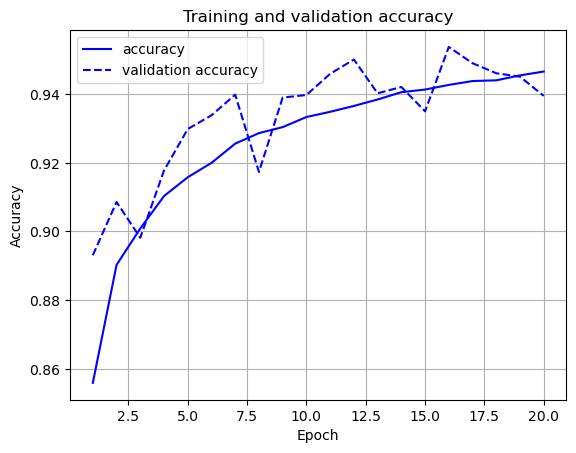

In [43]:
plot_acc(history_l2_reg)

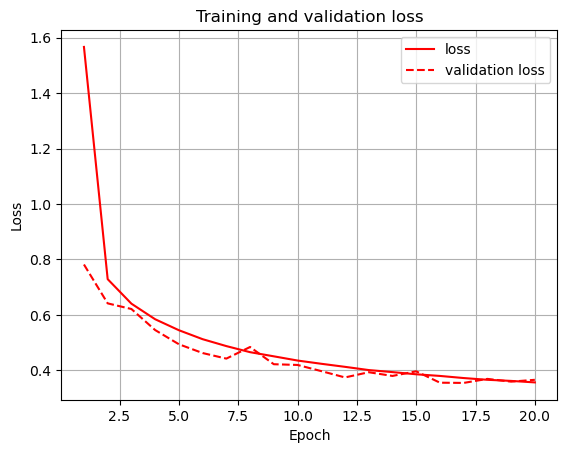

In [44]:
plot_loss(history_l2_reg)

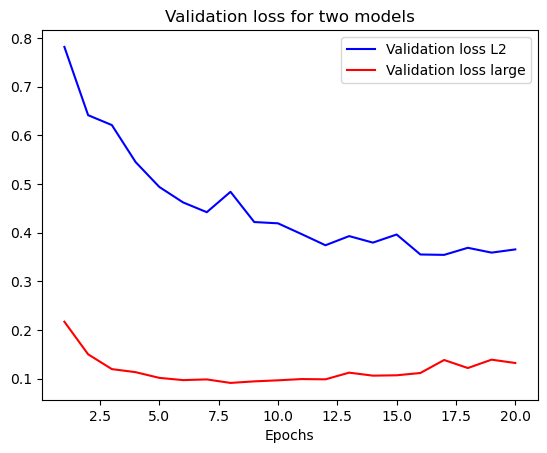

In [45]:
val_loss_l2 = history_l2_reg.history["val_loss"]
val_loss_large = history_large_model.history["val_loss"]

epochs = range(1, len(val_loss_l2) + 1)
plt.plot(epochs, val_loss_l2, "b-", label="Validation loss L2")
plt.plot(epochs, val_loss_large, "r", label="Validation loss large")
plt.xlabel("Epochs")
plt.title("Validation loss for two models")
#plt.ylabel("Accuracy")
plt.legend()
plt.show()

### ADDING DROPOUT Layers

In [46]:
model_DO = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(96, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model_DO.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

history_dropout = model_DO.fit(train_images, train_labels,
                               epochs=20,
                               batch_size=128,
                               validation_split=0.2
                              )

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: 0.7298 - accuracy: 0.7719 - val_loss: 0.2468 - val_accuracy: 0.9277
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.3540 - accuracy: 0.8992 - val_loss: 0.1961 - val_accuracy: 0.9414
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2789 - accuracy: 0.9202 - val_loss: 0.1670 - val_accuracy: 0.9523
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2475 - accuracy: 0.9298 - val_loss: 0.1461 - val_accuracy: 0.9598
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2236 - accuracy: 0.9375 - val_loss: 0.1389 - val_accuracy: 0.9609
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2056 - accuracy: 0.9423 - val_loss: 0.1325 - val_accuracy: 0.9633
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1967 - accuracy: 0.9444 - val_loss: 0.1341 - val_accuracy: 0.9633
Epoch 

In [47]:
model_DO.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 96)                75360     
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_14 (Dense)            (None, 96)                9312      
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_15 (Dense)            (None, 10)                970       
                                                                 
Total params: 85,642
Trainable params: 85,642
Non-trainable params: 0
_________________________________________________________________


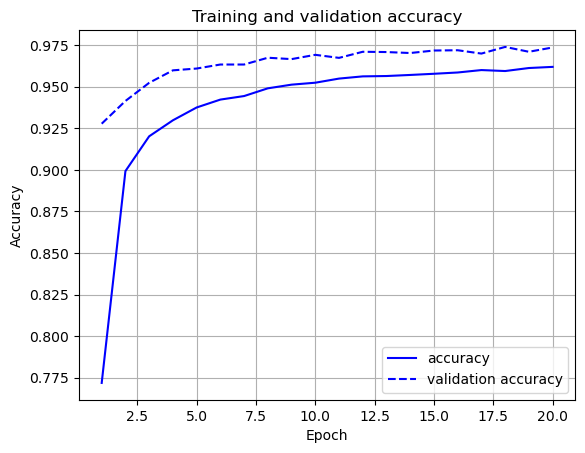

In [48]:
plot_acc(history_dropout)

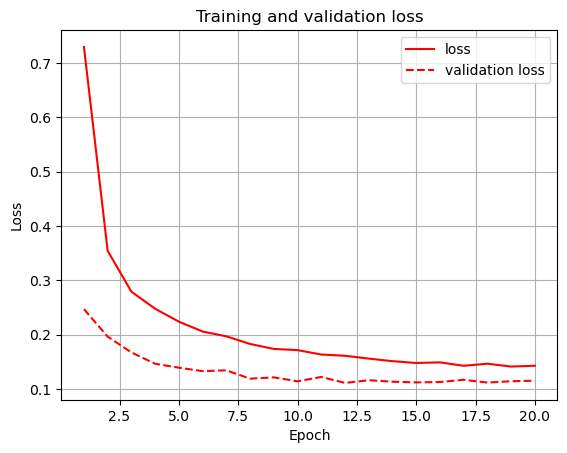

In [49]:
plot_loss(history_dropout)

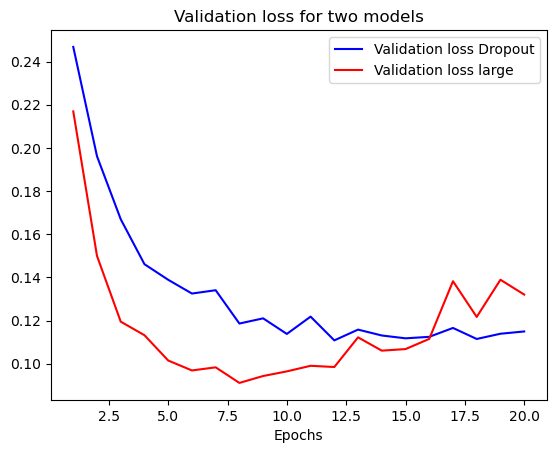

In [50]:
val_loss_DO = history_dropout.history["val_loss"]
val_loss_large = history_large_model.history["val_loss"]

epochs = range(1, len(val_loss_DO) + 1)
plt.plot(epochs, val_loss_DO, "b-", label="Validation loss Dropout")
plt.plot(epochs, val_loss_large, "r", label="Validation loss large")
plt.xlabel("Epochs")
plt.title("Validation loss for two models")
#plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Building CNN using the Functional API

* a `convnet` takes as input tensors of shape `(image_height, image_width, image_channels)`
* the output of every `Conv2D` and `MaxPooling2D` layer is a rank-3 tensor of shape `(height, width, channels)`

#### References:
* Chapter 8 of: François Chollet - Deep Learning with Python-Manning Publications (2021)
* Chapter 14 of: Aurélien Géron - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow - Concepts, Tools, and Techniques to Build Intelligent Systems-O’Reilly Media (2019)

### The convolution operation

* CNN is a class of deep learning networks, mostly applied to image data
* Applications: image recognition, natural language processing, video analysis, anomaly detection, drug discovery, health risk assessment, recommender systems, and time-series forecasting
* CNNs require a small amount of data preparation since their algorithm automatically perform them
*  Just like in feedforward neural networks, there is a loss function (e.g., crossentropy, MSE), a number of activation functions, and an optimizer (e.g., SGD, Adam optimizer) in CNNs.
* Additionally, though, in CNNs, there are also Convolutional layers, Pooling layers, and Flatten layers.
* The fundamental difference between a densely connected layer and a convolution layer is this:
* Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns—in the case of images, patterns found in small 2D windows of the inputs (see figure 8.1).
* This key characteristic gives convnets two interesting properties:
    * The patterns they learn are translation-invariant:
    * They can learn spatial hierarchies of patterns:
* Convolutions operate over rank-3 tensors called feature maps, with two spatial axes (height and width) as well as a depth axis (also called the channels axis)

### Load the MNIST dataset in Keras

* this dataset is already split into a training and testing set

* each input image is typically represented as a 3D tensor of shape `[height, width, channels]`

* a mini-batch is represented as a 4D tensor of shape `[mini- batch size, height, width, channels]`

* the weights of a convolutional layer are represented as a 4D tensor of shape `[fh, fw, fn′, fn]`

* the bias terms of a convolutional layer are simply represented as a 1D tensor of shape `[fn]`

In [51]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [52]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28), 60000, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [53]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [54]:
train_images.shape, train_images.shape[1:]

((60000, 28, 28, 1), (28, 28, 1))

### Instantiate a small `convnet`

In [55]:
input_shape = train_images.shape[1:]
inputs = keras.Input(shape=input_shape)

### Convolutional Layers

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

```python
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

* `filters`: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution)
* `kernel_size`: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions
* `strides`: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions
* `padding`: one of "valid" or "same" (case-insensitive)
    * "valid" means no padding.
    * If set to "VALID", the convolutional layer does not use zero padding and may ignore some rows and columns at the bottom and right of the input image, depending on the stride
    * "same" results in padding with zeros evenly to the left/right or up/down of the input
    * When padding="same" and strides=1, the output has the same size as the input
* `dilation_rate`: an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions
* `activation`: Activation function to use. If you don't specify anything, no activation is applied

In [56]:
x = layers.Conv2D(filters=32, 
                  kernel_size=3,
                  strides=1,
                  activation="relu")(inputs)

* the code above creates a `Conv2D` layer with `32 filters`, each `3 × 3`, using a `stride of 1` (both horizontally and vertically) and `"same" padding`, and applying the `ReLU activation function` to its outputs
* convolutional layers have quite a few hyperparameters you can choose from:
    * the number of filters,
    * their height and width,
    * the strides, and
    * the padding type
* you can use cross-validation to find the right hyperparameter values, but this is very time-consuming

### Memory requirements from Convolutional Layers
* convolutional layers require a huge amount of `RAM`, especially during training: everything computed during the forward pass needs to be preserved for the reverse pass, so the amount of RAM needed is (at least) the total amount of RAM required by all layers
* during inference (i.e., when making a prediction for a new instance) the RAM occupied by one layer can be released as soon as the next layer has been computed, so you only need as much RAM as required by two consecutive layers

In [57]:
x = layers.MaxPooling2D(pool_size=2)(x)

### Pooling Layers

https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

```python
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs
)
```

* `pool_size`: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
* `strides`: integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to pool_size
* `padding`: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input

#### What's their purpose:
* pooling layers `subsample` (i.e., shrink) the input image in order to:
    * reduce the computational load,
    * reduce the memory usage, and
    * reduce the number of parameters (thereby limiting the risk of overfitting)
    
* each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field
* you must define its size, the stride, and the padding type, just like in convolutional layers
* `difference`: a pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the `max` or `mean`

* `Downsides`: 
    * it is very destructive
    
#### MaxPooling vs AveragePooling:
`tf.keras.layers.AveragePooling2D`
* max pooling layers generally perform better
* computing the mean generally loses less information than comput‐ ing the max; however:
* max pooling preserves only the strongest features, getting rid of all the meaningless ones, so the next layers get a cleaner signal to work with
* max pooling offers stronger translation invariance than average pooling, and it requires slightly less compute

In [58]:
x = layers.Conv2D(filters=64, 
                  kernel_size=3, 
                  activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

In [59]:
x = layers.Conv2D(filters=128, 
                  kernel_size=3, 
                  activation="relu")(x)
x = layers.Flatten()(x)

### Flatten Layers
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

```python
tf.keras.layers.Flatten(
    data_format=None, **kwargs
)
```

* `Flatten` layers flatten two-dimensional arrays to a one-dimensional array before building the fully connected layers
* the last layer has 10 outputs and a softmax activation: we are doing a 10-way classification

In [60]:
outputs = layers.Dense(10, activation="softmax")(x)

In [61]:
model_CNN = keras.Model(inputs=inputs, outputs=outputs)

In [62]:
model_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

* You can see that the output of every Conv2D and MaxPooling2D layer is a rank-3 tensor of shape (height, width, channels)
* The width and height dimensions tend to shrink as you go deeper in the model.
* The number of channels is controlled by the first argument passed to the Conv2D layers (32, 64, or 128)
* After the last Conv2D layer, we end up with an output of shape (3, 3, 128)—a 3 × 3 feature map of 128 channels
* The next step is to feed this output into a densely con- nected classifier like those you’re already familiar with: a stack of Dense layers
* These classifiers process vectors, which are 1D, whereas the current output is a rank-3 tensor
* To bridge the gap, we flatten the 3D outputs to 1D with a Flatten layer before adding the Dense layers
* Finally, we do 10-way classification, so our last layer has 10 outputs and a softmax activation

* Because we’re doing 10-way classification with a softmax output, we’ll use the categorical crossentropy loss, and because our labels are integers, we’ll use the sparse version, sparse_categorical_crossentropy

### Train the `convnet` on MNIST images

In [63]:
model_CNN.compile(optimizer="rmsprop",# adam
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

history_model_CNN = model_CNN.fit(train_images, train_labels,
                                  epochs=5,
                                  batch_size=64,
                                  validation_split=0.2
                                 )

Epoch 1/5
750/750 [==============================] - 10s 11ms/step - loss: 0.1875 - accuracy: 0.9415 - val_loss: 0.0668 - val_accuracy: 0.9808
Epoch 2/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0525 - accuracy: 0.9835 - val_loss: 0.0568 - val_accuracy: 0.9822
Epoch 3/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0370 - val_accuracy: 0.9901
Epoch 4/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0402 - val_accuracy: 0.9883
Epoch 5/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0206 - accuracy: 0.9939 - val_loss: 0.0425 - val_accuracy: 0.9892


In [64]:
model_CNN.metrics_names

['loss', 'accuracy']

In [65]:
def plot_metrics(history):
    colors = ['r', 'b', 'g', 'c']
    metrics = history.history.keys()
    epochs = range(1, len(list(history.history.values())[0]) + 1)
    for m, c in zip(metrics,colors):
        plt.plot(epochs, history.history[m], color=c, label=m)
    plt.xlabel('Epoch')
    plt.legend()
    plt.title("Various Metrics")
    plt.grid(True)

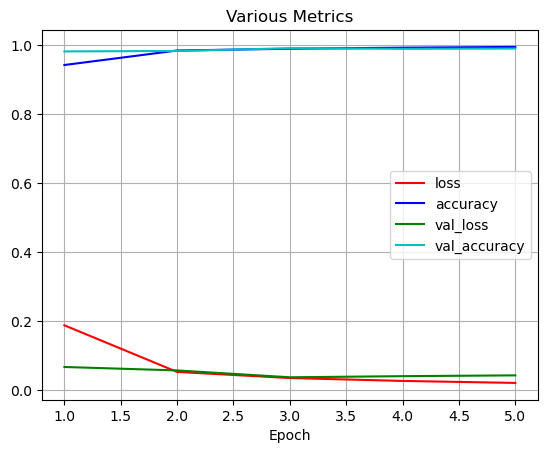

In [66]:
plot_metrics(history_model_CNN)

#### Evaluate the convnet

In [67]:
test_loss, test_acc = model_CNN.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

Test accuracy: 0.988


In [68]:
test_loss

0.0404127761721611

Whereas the densely connected model from chapter 2 had a test accuracy of 97.8%, the basic convnet has a test accuracy of 99.1%: we decreased the error rate by about 60% (relative). Not bad!

#### Make individual predictions

1/1 [==============================] - 0s 285ms/step
Our CNN model predicts that the digit in the image is: 9


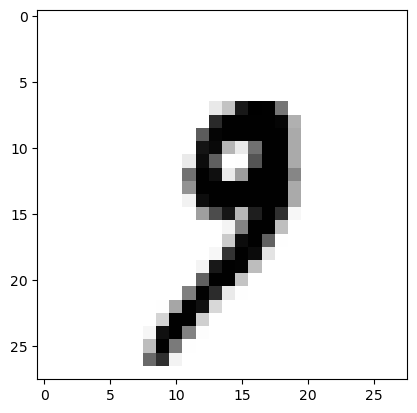

In [69]:
img_pred_index = 1000

plt.imshow(test_images[img_pred_index].reshape(28, 28), cmap='Greys')

pred = model_CNN.predict(test_images[img_pred_index].reshape(1, 28, 28, 1))

print("Our CNN model predicts that the digit in the image is:",
pred.argmax())

#### Save your model

https://www.tensorflow.org/tutorials/keras/save_and_load

In [70]:
model_CNN.save('digit_classifier')

INFO:tensorflow:Assets written to: digit_classifier/assets


INFO:tensorflow:Assets written to: digit_classifier/assets


In [71]:
# The following line is to stop the execution of the notebook after this cell:

%%script false --no-raise-error

UsageError: Line magic function `%%script` not found.


## Data augmentation

**`CAUTION: THIS DID NOT WORK FOR ME DUE TO OLDER TENSORFLOW VERSION`**

Section 8.2.5 Chollet

* Generate more training data from existing training samples by augmenting the samples via a number of random transformations that yield believable-looking images
* at training time, your model will never see the exact same picture twice
* expose the model to more aspects of the data so it can generalize better
* we can’t produce new information; we can only remix existing information
* just like `Dropout`, they’re inactive during inference (when we call `predict()` or `evaluate()`)
* During evaluation, our model will behave just the same as when it did not include data augmentation and dropout

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

* `RandomFlip("horizontal")`—Applies horizontal flipping to a random 50% of the images that go through it
https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip
* `RandomRotation(0.1)`—Rotates the input images by a random value in the range [–10%, +10%] (these are fractions of a full circle—in degrees, the range would be [–36 degrees, +36 degrees])
https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomRotation
* `RandomZoom(0.2)`—Zooms in or out of the image by a random factor in the range [-20%, +20%]
https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_images.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
input_shape = train_images.shape[1:]
inputs = keras.Input(shape=input_shape)

x = data_augmentation(inputs)
#x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_AG = keras.Model(inputs=inputs, outputs=outputs)

model_AG.compile(optimizer="rmsprop",# adam
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"]
                )

history_model_AG = model_AG.fit(train_images, train_labels,
                                epochs=5,
                                batch_size=64,
                                validation_split=0.2
                               )

In [ ]:
test_loss, test_acc = model_AG.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

* By further tuning the model’s configuration (such as the number of filters per convolution layer, or the number of layers in the model), we might be able to get an even better accuracy

### Also mnist dataset with CNN in Ch-7 of Yalcin: Applied Neural Networks with TensorFlow 2

From Chollet: chapters: 2, 5, 7, 8

https://www.tensorflow.org/tutorials/images/classification

### Image Classification:

https://www.tensorflow.org/tutorials/images/classification